## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import librarys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [69]:
! ls zippedData/

bom.movie_gross.csv.gz
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [70]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [164]:
#reading rt movie and reviews in notebook
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_1')

#merge the to dataframes
rt_df = pd.merge(rt_movie_info, rt_reviews, on = 'id')

#droping the na's
rt_df = rt_df.dropna()

#change the box_office in floats
rt_df['box_office'] =  rt_df['box_office'].str.replace(',', '').astype('float')

#spliting the values of genre in rows
rt_df['genre'] = rt_df['genre'].str.split('|')
rt_df = rt_df.explode('genre')

rt_df.head(1)

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


<ipython-input-191-d17a7c6b3f6f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right');


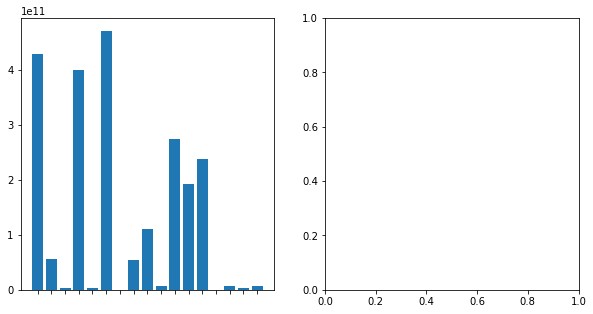

In [191]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
x = list(rt_df.groupby(['genre']).sum()['box_office'].keys())
y = list(rt_df.groupby(['genre']).sum()['box_office'].values)

ax1.bar(x,y)

plt.draw()

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right');

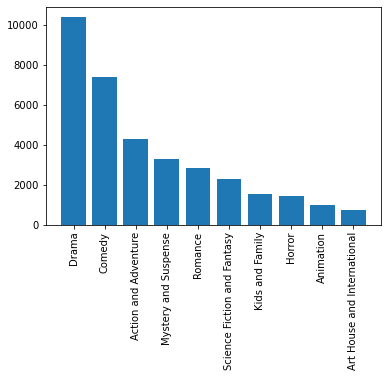

In [165]:
fig, ax = plt.subplots()
x = list(rt_df['genre'].value_counts().head(10).keys())
y = list(rt_df['genre'].value_counts().head(10).values)

ax.bar(x,y)
plt.xticks(rotation=90);

In [ ]:
fig

In [24]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [54]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#changing the str in to int
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('[\$,]', '').astype('float')
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('[\$,]', '').astype('float')

#droping the 0 values
drop_domestic_gross = tn_movie_budgets.index[tn_movie_budgets['domestic_gross'] == 0].tolist()
drop_worldwide_gross = tn_movie_budgets.index[tn_movie_budgets['worldwide_gross'] == 0].tolist()
drop_both = drop_domestic_gross + drop_worldwide_gross
tn_movie_budgets = tn_movie_budgets.drop(tn_movie_budgets.index[drop_both])

tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000.0,70071.0,7.164400e+04
5776,77,"Dec 31, 2004",The Mongol King,7000.0,900.0,9.000000e+02
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [55]:
tn_movie_budgets.corr()

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.033848,0.009432,-0.009368
production_budget,-0.033848,1.000000,0.678207,0.744875
domestic_gross,0.009432,0.678207,1.000000,0.937545
worldwide_gross,-0.009368,0.744875,0.937545,1.000000


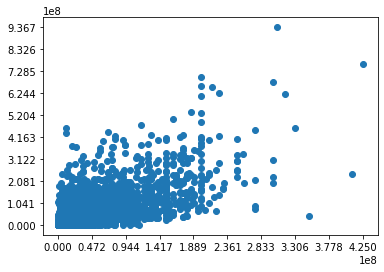

In [56]:
fig, ax = plt.subplots()
x = list(tn_movie_budgets['production_budget'].values)
y = list(tn_movie_budgets['domestic_gross'].values)
ax.scatter(x,y)
xticks = np.linspace(start=min(x), stop=max(x), num=10)
yticks = np.linspace(start=min(y), stop=max(y), num=10)
ax.set_xticks(xticks)
ax.set_yticks(yticks);

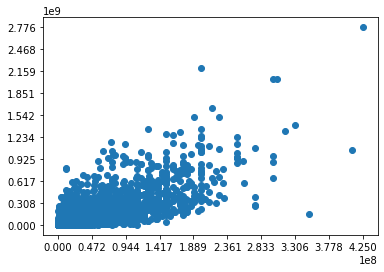

In [57]:
fig, ax = plt.subplots()
x = tn_movie_budgets['production_budget']
y = tn_movie_budgets['worldwide_gross']
ax.scatter(x,y)
xticks = np.linspace(start=min(x), stop=max(x), num=10)
yticks = np.linspace(start=min(y), stop=max(y), num=10)
ax.set_xticks(xticks)
ax.set_yticks(yticks);